In [1]:
%matplotlib inline
%run util_draw.py
import rootpy as rpy
from rootpy.io import root_open

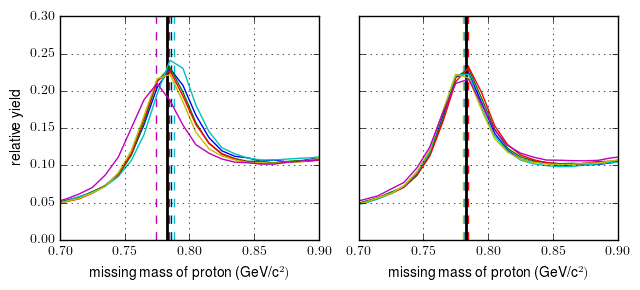

In [6]:
dir_b4 = 'mon'
dir_af = 'mon_pcor'
hn_tmpl = 'hmmppip_V_mmp_%d'
h_b4s, h_afs = [], []
with root_open('../e1f6/test/pcor_test_e1f.root', 'r') as fin:
    for sect in range(1,7):
        
        h = fin[dir_b4][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_b4_s%d'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('before, s%d'%sect)
#         b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
        hpx.Scale(1/hpx.Integral(b0,b1))
        h_b4s.append(asrootpy(hpx))
        
        h = fin[dir_af][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_af_s%d'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('after, s%d'%sect)
#         b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
        hpx.Scale(1/hpx.Integral(b0,b1))
        h_afs.append(asrootpy(hpx))

ymax = 0.3
fig, axes = plt.subplots(1,2, sharey=True, figsize=(6.5,3))
fgaus = R.TF1('fgaus', 'gaus', 0.7, 0.9)
colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
for ax, hs in zip(axes, [h_b4s, h_afs]):
    for icolor, h in enumerate(hs):
        fres = h.Fit(fgaus, 'N0S', 'goff', 0.76, 0.81)
        peak = fgaus.GetParameter(1)
        X, Y, E = list(h.x()), list(h.y()), list(zip(*h.yerr()))[0]
        ax.plot(X,Y, '%s-'%colors[icolor], label=h.get_title())
        ax.vlines(peak, 0, ymax, linestyles='dashed', colors=colors[icolor])
    ax.vlines(0.78265, 0, ymax, linewidth=2)
    ax.grid()
    ax.set_xlim(0.7,0.9)
    ax.set_ylim(0,ymax)
    ax.set_xlabel(r'missing mass of proton (GeV/c^2)')
axes[0].set_ylabel(r'relative yield')
plt.tight_layout()
plt.show()
fig.savefig('pcor_e1f_mmp_b4_af.pdf')

In [63]:
for hs in [h_b4s, h_afs]:
    for h in hs:
        fres = h.Fit(fgaus, 'N0S', 'goff', 0.76, 0.81)
        peak = fgaus.GetParameter(1)
        width = fgaus.GetParameter(2)
        print(peak,width)

0.7859376322284108 0.024073477413019417
0.78446401512701 0.0231530121554027
0.7837110899349717 0.024077861450231684
0.7883244133383753 0.022377983610705587
0.7824063986204258 0.02373651457349987
0.7739576826250557 0.03164707753026439
0.7822677630442987 0.0233610071983883
0.7832933872462076 0.02283655627953701
0.7842231367308431 0.022767487288505337
0.7813063491696647 0.02369844066625422
0.7807310517381877 0.023868251299917435
0.7819560110837095 0.025949711007516897


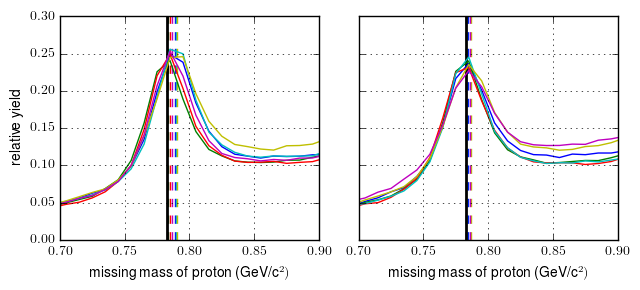

In [5]:
dir_b4 = 'mon'
dir_af = 'mon_pcor'
hn_tmpl = 'hmmppip_V_mmp_%d'
h_b4s, h_afs = [], []
with root_open('../e1f6/test/pcor_test_e16.root', 'r') as fin:
    for sect in range(1,7):
        
        h = fin[dir_b4][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_b4_s%d'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('before, s%d'%sect)
#         b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
        hpx.Scale(1/hpx.Integral(b0,b1))
        h_b4s.append(asrootpy(hpx))
        
        h = fin[dir_af][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_af_s%d'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('after, s%d'%sect)
#         b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
        hpx.Scale(1/hpx.Integral(b0,b1))
        h_afs.append(asrootpy(hpx))

ymax = 0.3
fig, axes = plt.subplots(1,2, sharey=True, figsize=(6.5,3))
fgaus = R.TF1('fgaus', 'gaus', 0.7, 0.9)
colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
for ax, hs in zip(axes, [h_b4s, h_afs]):
    for icolor, h in enumerate(hs):
        fres = h.Fit(fgaus, 'N0S', 'goff', 0.76, 0.81)
        peak = fgaus.GetParameter(1)
        X, Y, E = list(h.x()), list(h.y()), list(zip(*h.yerr()))[0]
        ax.plot(X,Y, '%s-'%colors[icolor], label=h.get_title())
        ax.vlines(peak, 0, ymax, linestyles='dashed', colors=colors[icolor])
    ax.vlines(0.78265, 0, ymax, linewidth=2)
    ax.grid()
    ax.set_xlim(0.7,0.9)
    ax.set_ylim(0,ymax)
    ax.set_xlabel(r'missing mass of proton (GeV/c^2)')
axes[0].set_ylabel(r'relative yield')
plt.tight_layout()
plt.show()
fig.savefig('pcor_e16_mmp_b4_af.pdf')

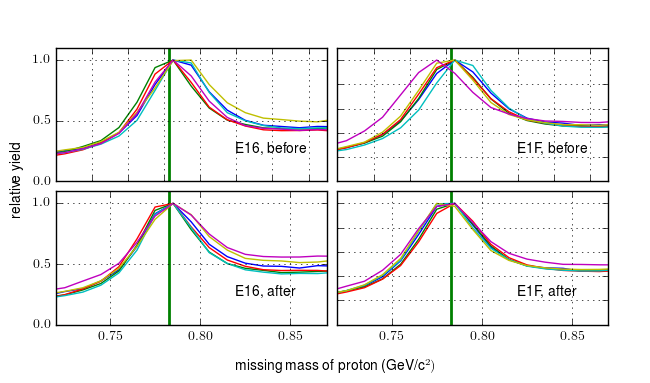

In [79]:
dir_b4 = 'mon'
dir_af = 'mon_pcor'
hn_tmpl = 'hmmppip_V_mmp_%d'
h_e1f_b4s, h_e1f_afs = [], []
h_e16_b4s, h_e16_afs = [], []

with root_open('../e1f6/test/pcor_test_e1f.root', 'r') as fin:
    for sect in range(1,7):
        
        h = fin[dir_b4][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_b4_s%d_e1f'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('e1f, before, s%d'%sect)
        b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        for ibin in range(0,b0):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
        for ibin in range(b1,hpx.GetNbinsX()+1):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
#         b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
#         hpx.Scale(1/hpx.Integral(b0,b1))
        hpx.Scale(1/hpx.GetMaximum())
        h_e1f_b4s.append(asrootpy(hpx))
        
        h = fin[dir_af][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_af_s%d_e1f'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('e1f, after, s%d'%sect)
        b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        for ibin in range(0,b0):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
        for ibin in range(b1,hpx.GetNbinsX()+1):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
#         b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.81)
#         hpx.Scale(1/hpx.Integral(b0,b1))
        hpx.Scale(1/hpx.GetMaximum())
        h_e1f_afs.append(asrootpy(hpx))

with root_open('../e1f6/test/pcor_test_e16.root', 'r') as fin:
    for sect in range(1,7):
        
        h = fin[dir_b4][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_b4_s%d_e16'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('e16, before, s%d'%sect)
        b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        for ibin in range(0,b0):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
        for ibin in range(b1,hpx.GetNbinsX()+1):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
#         b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
#         hpx.Scale(1/hpx.Integral(b0,b1))
        hpx.Scale(1/hpx.GetMaximum())
        h_e16_b4s.append(asrootpy(hpx))
        
        h = fin[dir_af][hn_tmpl%sect]
        hpx = h.ProjectionX('hmmp_af_s%d_e16'%sect, 131, 300)
        hpx.SetDirectory(0)
        hpx.SetTitle('after, s%d'%sect)
        b0,b1 = hpx.FindBin(0.71), hpx.FindBin(0.9)
        for ibin in range(0,b0):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
        for ibin in range(b1,hpx.GetNbinsX()+1):
            hpx.SetBinContent(ibin, 0)
            hpx.SetBinError(ibin, 0)
#         b0,b1 = hpx.FindBin(0.75), hpx.FindBin(0.8)
#         hpx.Scale(1/hpx.Integral(b0,b1))
        hpx.Scale(1/hpx.GetMaximum())
        h_e16_afs.append(asrootpy(hpx))


fgaus = R.TF1('fgaus', 'gaus', 0.7, 0.9)
colors = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
ymax = 1.1
nr, nc = 2, 2
space, hspace = 0.04, 0.075
fig = plt.figure(figsize=goldenaspect(6.5, nr, nc))
gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=hspace,
                       left=0.1, right=0.95, bottom=0.175)
hss = [h_e16_b4s, h_e16_afs, h_e1f_b4s, h_e1f_afs]
lbls = ['E16, before', 'E16, after',
        'E1F, before', 'E1F, after']
for irow in range(0, nr):
    for icol in range(0, nc):
        ax = plt.subplot(gs[irow,icol])
        linid = nr*icol+irow
        hs = hss[linid]
        for icolor, h in enumerate(hs):
            fres = h.Fit(fgaus, 'N0S', 'goff', 0.76, 0.81)
            peak = fgaus.GetParameter(1)
            X, Y, E = list(h.x()), list(h.y()), list(zip(*h.yerr()))[0]
            ax.plot(X,Y, '%s-'%colors[icolor], label=h.get_title())
#             ax.vlines(peak, 0, ymax, linestyles='dashed', colors=colors[icolor])
        ax.vlines(0.78265, 0, ymax, linewidth=2, colors='g')
        ax.text(0.82, 0.24, lbls[linid])
        ax.grid()
        ax.set_xlim(0.72,0.87)
        ax.set_ylim(0,ymax)
        if icol > 0:
            ax.set_yticklabels('')
        else:
            ax.set_yticks(np.arange(0,ymax,0.5))
        if irow+1 < nr:
            ax.set_xticklabels('')
        else:
            ax.set_xticks(np.arange(0.75, 0.87, 0.05))

fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
plt.xticks([])
plt.yticks([])
plt.ylabel('relative yield')
plt.xlabel('missing mass of proton (GeV/c^2)')

#     ax.set_xlabel(r'missing mass of proton (GeV/c^2)')
# axes[0].set_ylabel(r'relative yield')
# plt.tight_layout()
plt.show()
fig.savefig('pcor_mmp_b4_af.pdf')

In [12]:
axes

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34f1bac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34f07860>], dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34f1bac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34f07860>], dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34173d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34b1cac8>], dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34173d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34b1cac8>], dtype=object)]

In [82]:
h.GetBinCenter(h.FindBin(0.71))

0.7050000152804635